In [48]:
import pandas as pd
import numpy as np #math np.sqrt np.sin
import random #simulations
import matplotlib.pyplot as plt #plots stuff

df = pd.read_csv('rollercoaster.csv')
df.head()

df.columns = df.columns.str.strip()
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
Name                        300 non-null object
Park                        300 non-null object
City/Region                 300 non-null object
City/State/Region           300 non-null object
Country/Region              300 non-null object
Geographic Region           300 non-null object
Construction                300 non-null object
Type                        300 non-null object
Status                      300 non-null object
Year/Date Opened            300 non-null int64
Height (feet)               299 non-null object
Speed (mph)                 296 non-null float64
Length (feet)               295 non-null float64
Inversions (YES or NO)      300 non-null object
Number of Inversions        300 non-null int64
Drop (feet)                 142 non-null object
Duration (min:sec)          224 non-null object
G Force                     83 non-null object
Vertical Angle (degrees)    91 n

In [49]:
#Cleaning up the data
df.iloc[111, 10] = 200
df['Height (feet)'] = df['Height (feet)'].astype(float)
df['Height (feet)'] = df['Height (feet)'].dropna()
df = df.drop(columns = ['Vertical Angle (degrees)'])
df = df.dropna(subset = ['Speed (mph)', 'Year/Date Opened'])

In [50]:
#Finding the oldest rollercoaster
age = df[["Name", "Year/Date Opened"]]
age_sorted = age.sort_values(by='Year/Date Opened', ascending = True)
print(age[age['Year/Date Opened'] == age['Year/Date Opened'].min()])

             Name  Year/Date Opened
108  Giant Dipper              1924


In [51]:
#Considering only the operating rollercoasters + More
Operating = df[df.Status == 'Operating']
Operating = Operating.dropna(subset = ['Height (feet)', 'Speed (mph)'])
Operating = Operating.drop(["Park","City/Region","City/State/Region","Geographic Region",'Year/Date Opened', 'Status'], axis = 1)
Operating = Operating.fillna(0)

In [52]:
#Adding Values for Names
Operating.loc[Operating.Type == 'Sit Down','Type'] = 0
Operating.loc[Operating.Type == 'Inverted','Type'] = 0.2
Operating.loc[Operating.Type == 'Stand Up','Type'] = 0.3
Operating.loc[Operating.Type == 'Flying','Type'] = 0.5
Operating.loc[Operating.Type == 'Suspended','Type'] = 0.3
Operating.loc[Operating.Type == 'Steel','Type'] = 0.1
Operating.loc[Operating.Type == 'Wing','Type'] = 0.4
Operating.loc[Operating.Type == 'Wood','Type'] = 0.2
Operating.loc[Operating['Inversions (YES or NO)'] == 'NO','Inversions (YES or NO)'] = 0
Operating.loc[Operating['Inversions (YES or NO)'] == 'YES','Inversions (YES or NO)'] = 1

In [53]:
#Assigning a score for each coaster
Score = Operating.assign(Score = lambda x:
                 1.5 * ((Operating['Height (feet)'] - Operating['Height (feet)'].min())/(Operating['Height (feet)'].max() -                                                            Operating['Height (feet)'].min()))
               + 0.7 * ((Operating['Length (feet)'] - Operating['Length (feet)'].min())/(Operating['Length (feet)'].max() -                                                            Operating['Length (feet)'].min()))
               + 2.0 * ((Operating['Speed (mph)'] - Operating['Speed (mph)'].min())/(Operating['Speed (mph)'].max() -                                                                  Operating['Speed (mph)'].min()))
               + 1.0 * ((Operating['Type'] - Operating['Type'].min())/(Operating['Type'].max() -                                                                                      Operating['Type'].min()))
               + 0.7 * (((Operating['Number of Inversions'] - Operating['Number of Inversions'].min())/(Operating['Number of Inversions'].max() -                                Operating['Number of Inversions'].min())))
                        )

In [54]:
#Ranking based on Score
Score["Rank"] = Score["Score"].rank(ascending = True)
Score = Score.sort_values(by = 'Rank', ascending = False)
Score = Score.assign(Rank = lambda x: 285 - Score['Rank'])

In [55]:
#Compared to Coasterbuzz
Coasterbuzz = df.drop(["Park","City/Region","City/State/Region","Geographic Region",'Year/Date Opened', 'Status'], axis = 1)
Coasterbuzz = df.sort_values(by='CoasterBuzz Ranking', ascending = False)
Coasterbuzz.head(10)

,Name,Park,City/Region,City/State/Region,Country/Region,Geographic Region,Construction,Type,Status,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Drop (feet),Duration (min:sec),G Force,CoasterBuzz Ranking
242,Steel Vengeance,Cedar Point,Sandusky,Ohio,United States,North America,Steel,Sit Down,Operating,2018,205.0,74.0,5740.0,YES,4,200,2:30,NaN,4.95378
103,Fury 325,Carowinds,Charlotte,North Carolina,United States,North America,Steel,Sit Down,Operating,2015,325.0,95.0,6602.0,NO,0,320,NaN,NaN,4.86473
80,El Toro,Six Flags Great Adventure,Jackson,New Jersey,United States,North America,Wood,Sit Down,Operating,2006,181.0,70.0,4400.0,NO,0,176,1:42,NaN,4.82984
152,Lightning Rod,Dollywood,Pigeon Forge,Tennessee,United States,North America,Wood,Sit Down,Operating,2016,207.0,73.0,3800.0,NO,0,165,NaN,3.5,4.81132
163,Millennium Force,Cedar Point,Sandusky,Ohio,United States,North America,Steel,Sit Down,Operating,2000,310.0,93.0,6595.0,NO,0,300,2:20,NaN,4.77295
276,Twisted Colossus,Six Flags Magic Mountain,Valencia,California,United States,North America,Steel,Sit Down,Operating,2015,121.0,57.0,4990.0,YES,2,128,3:40,NaN,4.76860
287,Voyage,Holiday World,Santa Clause,Indiana,United States,North America,Wood,Sit Down,Operating,2006,159.0,67.0,6442.0,NO,0,154,2:45,NaN,4.70667
134,Iron Rattler,Six Flags Fiesta Texas,San Antonio,Texas,United States,North America,Steel,Sit Down,Operating,2013,179.0,70.0,3266.0,YES,1,171,,NaN,4.69231
160,Maverick,Cedar Point,Sandusky,Ohio,United States,North America,Steel,Sit Down,Operating,2007,105.0,70.0,4450.0,YES,2,100,2:30,NaN,4.69178
151,Leviathan,Canada's Wonderland,Vaughan,Onterio,Canada,North America,Steel,Sit Down,Operating,2012,306.0,92.0,5486.0,NO,0,306,3:28,NaN,4.68807


In [56]:
#Top 10 Rollercoasters
Score.head(10)

,Name,Country/Region,Construction,Type,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Drop (feet),Duration (min:sec),G Force,CoasterBuzz Ranking,Score,Rank
146,Kingda Ka,United States,Steel,0,456.0,128.0,3118.0,0,0,418,0:28,0,3.95601,3.41988,1.0
273,Top Thrill Dragster,United States,Steel,0,420.0,120.0,2800.0,0,0,400,0:30,0,4.44340,3.13393,2.0
99,Formula Rossa,United Arab Emirates,Steel,0,170.6,149.1,6561.7,0,0,0,0,0,0.00000,3.06217,3.0
79,Eejanaika,Japan,Steel,0.4,249.3,78.3,3782.8,1,3,0,2:10,0,0.00000,2.88018,4.0
239,Steel Dragon 2000,Japan,Steel,0,318.3,95.0,8133.2,0,0,306.8,4:00,,0.00000,2.8228,5.0
208,Red Force,Spain,Steel,0,367.3,111.8,2887.2,0,0,0,0,0,0.00000,2.82088,6.0
73,Dinoconda,China,Steel,0.4,226.4,78.3,3444.9,1,3,0,0,0,0.00000,2.77065,7.0
103,Fury 325,United States,Steel,0,325.0,95.0,6602.0,0,0,320,0,0,4.86473,2.71455,8.0
254,Superman: Escape from Krypton,United States,Steel,0,415.0,100.0,1235.0,0,0,328.1,0:28,4.5,4.10185,2.65136,9.0
163,Millennium Force,United States,Steel,0,310.0,93.0,6595.0,0,0,300,2:20,0,4.77295,2.62822,10.0


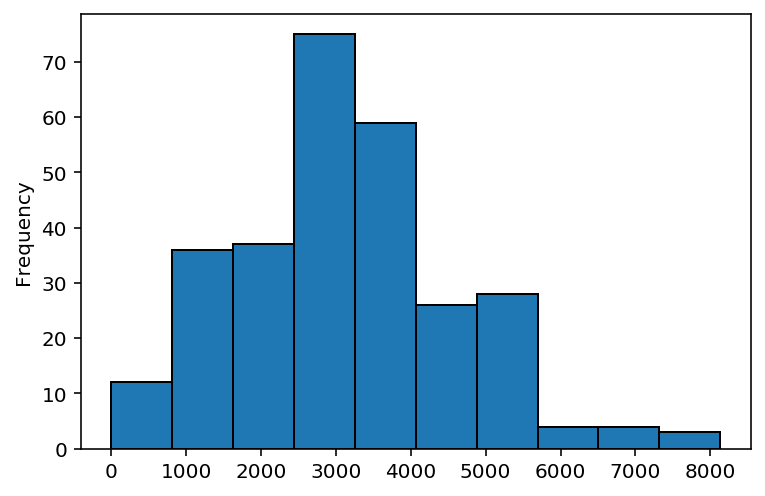

In [57]:
#Histogram of Length
Operating['Length (feet)'].plot.hist(edgecolor = "black")

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

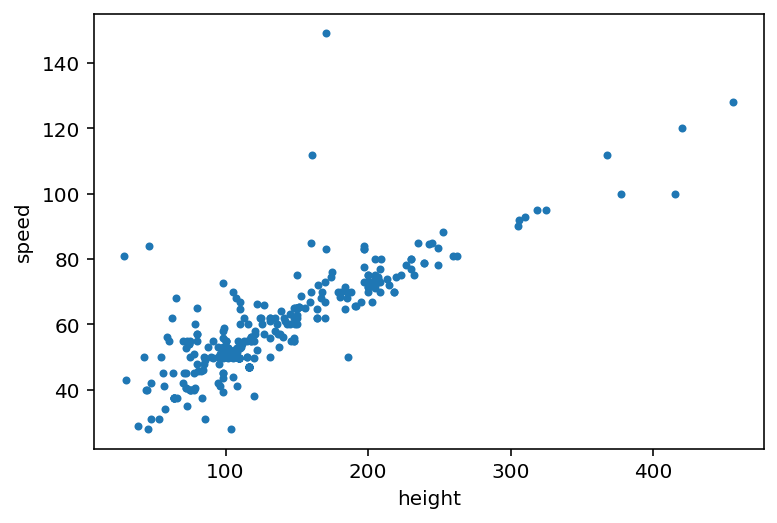

In [64]:
h_dat = df['Height (feet)'].astype(float)
s_dat = df['Speed (mph)']
plt.plot(h_dat,s_dat,".")
plt.xlabel("height")
plt.ylabel("speed")

import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array(list(h_dat.values))
y = np.array(list(s_dat.values))
model = LinearRegression()

# Choose the predictor variable, which in this case is X:
X=np.array(list(h_dat.values)).reshape(-1,1)
# Fit the model to the full dataset
#model.fit(X, y)
# print out intercept
#print('b: ', model.intercept_)
# print out other coefficients
#print('m: ', model.coef_)

#plot
plt.plot(X,y,'.', X, model.predict(X));
plt.xlabel('year');
plt.ylabel('cost');
S_dat.info()


In [62]:
model = LinearRegression()
# Choose the response variable, which in this case is y
y = df.array(list(s_dat.values))
# Choose the predictor variable, which in this case is X:
X = df.array(list(h_dat.values)).reshape(-1,1)
# Fit the model to the full dataset
model.fit(X, y)
# print out intercept
print('b: ', model.intercept_)
# print out other coefficients
print('m: ', model.coef_)

#plot
plt.plot(X,y,'.', X, model.predict(X));
plt.xlabel('year');
plt.ylabel('cost');

AttributeError: 'DataFrame' object has no attribute 'array'

ValueError: could not convert string to float: '200 ft'